# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/ADMIN'

f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [8]:
print('AMT_INCOME_TOTAL的平均值為：')
app_train['AMT_INCOME_TOTAL'].mean()


AMT_INCOME_TOTAL的平均值為：


168797.9192969845

In [9]:
print('AMT_INCOME_TOTAL的標準差為:')
app_train['AMT_INCOME_TOTAL'].std()

AMT_INCOME_TOTAL的標準差為:


237123.14627883647

In [10]:
print(list(app_train['AMT_INCOME_TOTAL'])[:10])
len(app_train['AMT_INCOME_TOTAL'])

[202500.0, 270000.0, 67500.0, 135000.0, 121500.0, 99000.0, 171000.0, 360000.0, 112500.0, 135000.0]


307511

In [12]:
def bars(x,bins):
    # Mean
#     print("Mean: ", app_train[x].mean())
#     # Median
#     print("Median: ", app_train[x].median())
#     # Mode
#     print("Mode: ", app_train[x].mode()[0])
#     # Min
#     print("Min: ", app_train[x].min())
#     # Max
#     print("Max: ", app_train[x].max())
#     # Quartiles
#     y = 0.5
#     print("Quartiles on ", y*100,"%: ", app_train[x].quantile(y))
#     # Variance
#     print("Variance: ", app_train[x].var())
#     # Standard deviation
#     print("Standard deviation: ", app_train[x].std())
    print("="*30)
    describe = app_train[x].describe().apply(lambda x: round(x, 1))  # 取小數第一位
    print("用describe可以直接列出以下常用數值\n", describe)

    #直方圖（Histogram)
    plt.hist(app_train[x],
             bins=bins,
             # bins=[100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000], 
             alpha=0.7, rwidth=0.9)
    plt.xlabel(x)
    plt.ylabel('Amount')
    plt.title('My Histogram')
    plt.show()

AMT_INCOME_TOTAL
用describe可以直接列出以下常用數值
 count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


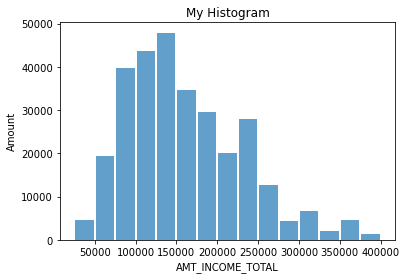

In [13]:


x = 'AMT_INCOME_TOTAL'
bins = [25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000]
print(x)
bars(x,bins)



Text(0.5, 0, 'AMT_INCOME_TOTAL')

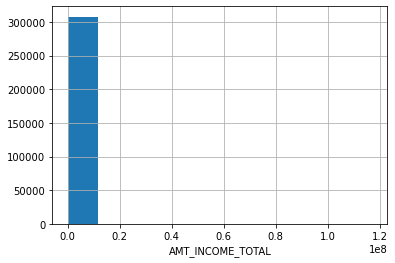

In [14]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

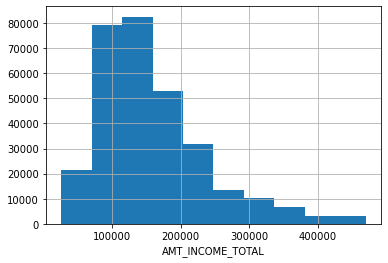

In [15]:
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')